**传播类聚类**是一种基于数据点之间信息传播的方法，常见的模型包括 **Affinity Propagation** 和其变种。以下是相关代码示例：

---

### **1. Affinity Propagation**
#### **特点**
- 不需要预定义簇的数量。
- 数据点之间通过相似性传播消息，逐步确定簇的中心（exemplar）。
- 使用 `scikit-learn` 中的 `AffinityPropagation`。

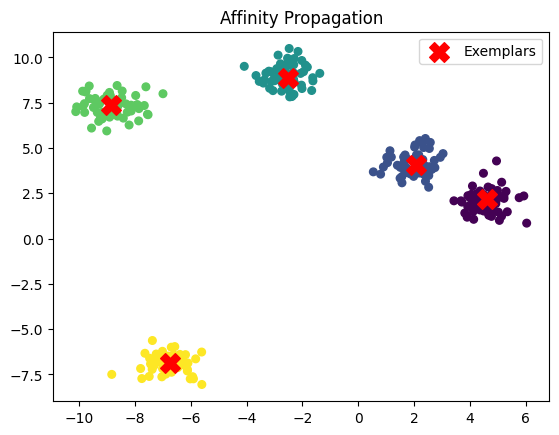

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import pairwise_distances

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.6, random_state=42)

# Affinity Propagation
model = AffinityPropagation(random_state=42)
y_pred = model.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Exemplars')
plt.title("Affinity Propagation")
plt.legend()
plt.show()

### **2. 自定义相似性矩阵**
#### **特点**
- Affinity Propagation 支持预定义的相似性矩阵，可根据具体需求计算点之间的自定义相似性。

In [4]:
# # Compute custom similarity matrix (negative squared Euclidean distances)
# similarity_matrix = -pairwise_distances(X, metric='sqeuclidean')

# # Affinity Propagation with custom similarity matrix
# model = AffinityPropagation(affinity='precomputed', random_state=42)
# y_pred = model.fit_predict(similarity_matrix)

# # Plot results
# plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30)
# plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Exemplars')
# plt.title("Affinity Propagation (Custom Similarity)")
# plt.legend()
# plt.show()

### **3. Affinity Propagation for Large-Scale Data**
#### **特点**
- 原始 Affinity Propagation 算法对大规模数据效率较低，可以结合随机采样或简化相似性矩阵来优化性能。

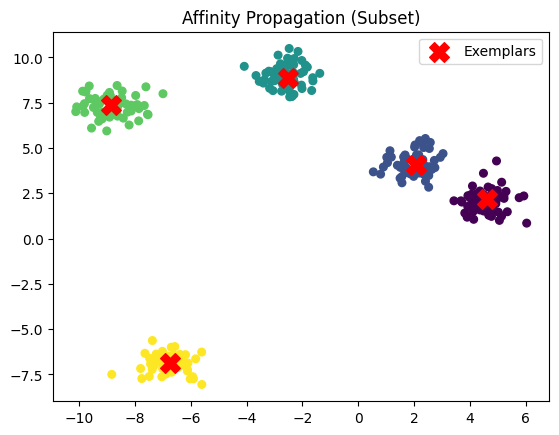

In [3]:
# Subsample data for large-scale clustering
subset = X[:1000]  # Use a subset of data for demonstration
model = AffinityPropagation(random_state=42)
y_pred = model.fit_predict(subset)

# Plot results for subset
plt.scatter(subset[:, 0], subset[:, 1], c=y_pred, cmap='viridis', s=30)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Exemplars')
plt.title("Affinity Propagation (Subset)")
plt.legend()
plt.show()

### **4. 优缺点总结**

| **优点**                                   | **缺点**                                 |
|--------------------------------------------|------------------------------------------|
| 不需要预定义簇的数量                        | 对相似性矩阵敏感                         |
| 能识别非线性结构的簇                        | 对大规模数据效率较低                     |
| 支持自定义相似性矩阵                        | 算法复杂度较高                           |
| 适合处理复杂数据分布和不规则形状的簇         | 需要调节偏好参数 (`preference`) 来影响结果 |

---

### **注意事项**
1. **参数调整**：
   - **`preference`**：控制簇的数量。较高的 `preference` 值会产生更多的簇。
   - **`damping`**：影响消息传递的收敛速度，建议保持在 [0.5, 1) 之间。

2. **适用场景**：
   - 数据具有复杂形状且难以确定簇数时。
   - 需要对簇的中心点（exemplar）有明确解释时。

---